In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

df = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')
df.head()

C:\Users\spleahy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,...,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,...,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,...,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


## Initial Investigation

In [41]:
for col in df.columns:
    print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

In [42]:
len(set(df['GameID']))

2048

In [43]:
len(df['GameID'])

362447

In [44]:
df['GameID']=df['GameID'].astype(int)


In [45]:
for col in df:
    print(col)
    print()
    print(df[col].unique())
    print('-------------------------------------------------------------')

Date

['2009-09-10' '2009-09-13' '2009-09-14' '2009-09-20' '2009-09-21'
 '2009-09-27' '2009-09-28' '2009-10-04' '2009-10-05' '2009-10-11'
 '2009-10-12' '2009-10-18' '2009-10-19' '2009-10-25' '2009-10-26'
 '2009-11-01' '2009-11-02' '2009-11-08' '2009-11-09' '2009-11-12'
 '2009-11-15' '2009-11-16' '2009-11-19' '2009-11-22' '2009-11-23'
 '2009-11-26' '2009-11-29' '2009-11-30' '2009-12-03' '2009-12-06'
 '2009-12-07' '2009-12-10' '2009-12-13' '2009-12-14' '2009-12-17'
 '2009-12-19' '2009-12-20' '2009-12-21' '2009-12-25' '2009-12-27'
 '2009-12-28' '2010-01-03' '2010-09-09' '2010-09-12' '2010-09-13'
 '2010-09-19' '2010-09-20' '2010-09-26' '2010-09-27' '2010-10-03'
 '2010-10-04' '2010-10-10' '2010-10-11' '2010-10-17' '2010-10-18'
 '2010-10-24' '2010-10-25' '2010-10-31' '2010-11-01' '2010-11-07'
 '2010-11-08' '2010-11-11' '2010-11-14' '2010-11-15' '2010-11-18'
 '2010-11-21' '2010-11-22' '2010-11-25' '2010-11-28' '2010-11-29'
 '2010-12-02' '2010-12-05' '2010-12-06' '2010-12-09' '2010-12-12'
 '20

['TEN' 'PIT' 'MID' 'MIN' 'CLE' 'DET' 'NO' 'TB' 'DAL' 'NYJ' 'HOU' 'JAC'
 'IND' 'CIN' 'DEN' nan 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'SEA'
 'STL' 'WAS' 'NYG' 'CHI' 'GB' 'BUF' 'NE' 'SD' 'OAK' '50' 'LA' 'JAX']
-------------------------------------------------------------
yrdln

[ 30.  42.  47.  44.   2.   6.   4.  43.  40.  31.  22.  41.  11.  19.  27.
  28.  21.  26.  36.  49.  23.  24.  32.  34.   5.  13.  25.  15.  33.  38.
  39.  17.  12.  37.  29.  14.  46.  50.  45.  10.  16.  18.  48.   9.   3.
  20.   1.  35.   8.   7.  nan]
-------------------------------------------------------------
yrdline100

[ 30.  58.  53.  56.  98.  94.  96.  43.  40.  31.  22.  41.  89.  42.  19.
  73.  72.  70.  79.  74.  64.  69.  60.  57.  49.  44.  77.  76.  32.  34.
  95.  87.  75.  85.  67.  66.  62.  61.  17.  12.  13.  21.  63.  37.   2.
  71.  29.  14.  68.  54.  50.  55.  46.  45.  90.  84.  86.  82.  18.  48.
  27.  33.  10.   9.   4.  97.   3.  78.  59.  15.  51.  20.  24.   1.  81.
  

['None' '00-0022924' '00-0003292' '00-0025409' '00-0005106' '00-0024279'
 '00-0020531' '00-0026498' '00-0021678' '00-0022177' '00-0022725'
 '00-0022787' '00-0026898' '00-0010346' '00-0021231' '00-0023541'
 '00-0021429' '00-0004161' '00-0011022' '00-0025423' '00-0021206'
 '00-0025708' '00-0024300' '00-0026158' '00-0026143' '00-0019559'
 '00-0027020' '00-0017200' '00-0020679' '00-0007091' '00-0019599'
 '00-0022803' '00-0021190' '00-0023460' '00-0023459' '00-0024226'
 '00-0019596' '00-0025479' '00-0025388' '00-0022942' '00-0024408'
 '00-0021179' '00-0021216' '00-0023662' '00-0024225' '00-0022055'
 '00-0023968' '00-0023457' '00-0023645' '00-0025561' '00-0020608'
 '00-0026300' '00-0020245' '00-0023474' '00-0022164' '00-0011626'
 '00-0026197' '00-0003739' '00-0022217' '00-0025431' '00-0022864'
 '00-0024218' '00-0023437' '00-0025430' '00-0002110' '00-0023176'
 '00-0003315' '00-0023742' '00-0026625' '00-0023682' '00-0024110'
 '00-0026993' '00-0024824' '00-0023436' '00-0026349' '00-0025970'
 '0

[nan 'W.Parker' 'C.Johnson' ..., 'P.Richardson' 'R.Mostert' 'J.Kerridge']
-------------------------------------------------------------
Rusher_ID

['None' '00-0022250' '00-0026164' '00-0026163' '00-0024260' '00-0022924'
 '00-0022217' '00-0003292' '00-0019693' '00-0023176' '00-0027130'
 '00-0025394' '00-0022746' '00-0026998' '00-0023774' '00-0021314'
 '00-0025409' '00-0024279' '00-0024011' '00-0024217' '00-0026204'
 '00-0026286' '00-0027129' '00-0026498' '00-0023544' '00-0026262'
 '00-0021678' '00-0026162' '00-0023440' '00-0022770' '00-0022177'
 '00-0022766' '00-0026113' '00-0021755' '00-0022922' '00-0026229'
 '00-0022092' '00-0019641' '00-0024332' '00-0026898' '00-0022787'
 '00-0024318' '00-0013694' '00-0024245' '00-0024275' '00-0021231'
 '00-0027003' '00-0024103' '00-0010346' '00-0020270' '00-0023439'
 '00-0026988' '00-0025439' '00-0027103' '00-0026941' '00-0020397'
 '00-0026367' '00-0023541' '00-0020462' '00-0021429' '00-0024242'
 '00-0020337' '00-0004161' '00-0026153' '00-0011022' '

[nan 'Fair Catch' 'Touchback' 'Touchdown']
-------------------------------------------------------------
Returner

['S.Logan' nan 'C.Finnegan' 'J.Ringer' 'A.Elam' 'P.Harvin' 'J.Cribbs'
 'D.Reynaud' 'S.Rice' 'R.Meachem' 'R.Bush' 'A.Brown' 'D.Bing' 'F.Jones'
 'C.Smith' 'P.Crayton' 'J.Jones' 'L.Washington' 'J.Leonhard' 'T.Rushing'
 'C.Simpson' 'B.Witherspoon' 'Q.Cosby' 'E.Royal' 'A.Caldwell' 'M.Goodson'
 'E.Hobbs' 'D.Jackson' 'C.Munnerlyn' 'J.Charles' 'C.Carr' 'Q.Lawrence'
 'E.Reed' 'M.Leggett' 'D.Edwards' 'B.Engram' 'A.Studebaker' 'E.Weems'
 'D.Bess' 'T.Ginn' 'P.Cobbs' 'B.Finneran' 'A.Rossum' 'A.Rolle'
 'L.Stephens-Howling' 'D.Avery' 'N.Burleson' 'D.Stanley' 'J.Forsett'
 'S.Gado' 'J.Wilson' 'D.Ware' 'M.Sellers' 'D.Hixon' 'R.Cartwright'
 'M.Hedgecock' 'S.Moss' 'H.Nicks' 'L.Betts' 'J.Nelson' 'D.Hester'
 'D.Manning' 'E.Bennett' 'L.Maroney' 'W.Welker' 'K.Faulk' 'R.Parrish'
 'L.McKelvin' 'L.Rankin' 'J.Higgins' 'D.Sproles' 'J.Norwood' 'M.Peterson'
 'D.Northcutt' 'A.Randle El' 'K.Darby' 'D.Thom

[nan 'PIT' 'TEN' 'CLE' 'MIN' 'NO' 'DET' 'TB' 'DAL' 'HOU' 'NYJ' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'STL' 'SEA'
 'WAS' 'NYG' 'GB' 'CHI' 'BUF' 'NE' 'SD' 'OAK' 'LA']
-------------------------------------------------------------
PenaltyType

[nan 'Illegal Formation' 'Encroachment' 'Delay of Game' 'False Start'
 'Ineligible Downfield Kick' 'Defensive Offside' 'Personal Foul'
 'Illegal Shift' 'Running Into the Kicker' 'Illegal Contact'
 'Defensive Holding' 'Offensive Holding' 'Illegal Motion'
 'Illegal Substitution' 'Face Mask (15 Yards)' 'Neutral Zone Infraction'
 'Ineligible Downfield Pass' 'Illegal Blindside Block'
 'Offensive Pass Interference' 'Illegal Use of Hands'
 'Defensive Pass Interference' 'Defensive Delay of Game' 'Low Block'
 'Defensive 12 On-field' 'Offensive Offside' 'Unnecessary Roughness'
 'Illegal Block Above the Waist' 'Illegal Touch Pass' 'Illegal Touch Kick'
 'Roughing the Passer' 'Offside on Free Kick' 'Tripping'
 'Illegal Forward Pas

[ 0.48567499  0.54643284  0.55108782 ...,  0.09343526  0.03406886
  0.0357081 ]
-------------------------------------------------------------
Away_WP_pre

[ 0.51432501  0.45356716  0.44891218 ...,  0.90656474  0.96593114
  0.9642919 ]
-------------------------------------------------------------
Home_WP_post

[ 0.54643284  0.55108782  0.51079309 ...,  0.09343526  0.03406886
  0.0357081 ]
-------------------------------------------------------------
Away_WP_post

[ 0.45356716  0.44891218  0.48920691 ...,  0.90656474  0.96593114
  0.9642919 ]
-------------------------------------------------------------
Win_Prob

[ 0.48567499  0.54643284  0.55108782 ...,  0.09343526  0.96593114
  0.9642919 ]
-------------------------------------------------------------
WPA

[ 0.06075785  0.00465498 -0.04029473 ..., -0.0593664  -0.00163924
  0.0357081 ]
-------------------------------------------------------------
airWPA

[        nan -0.03224399  0.10666256 ..., -0.00553509  0.03451662
  0.04153432]
----

Tie Games: 2014101202, 2012111110, 2013112403, 2016102312, 2016103000

In [46]:
df_cleaned = df.drop(columns=['desc','yrdln','PlayTimeDiff','time','Date','SideofField',
                              'PlayAttempted','DefTwoPoint','Passer','Passer_ID','PassLength','PassLocation','Interceptor',
                              'Rusher','Rusher_ID','RunLocation','RunGap','Receiver','Receiver_ID','Returner',
                              'BlockingPlayer','Tackler1','Tackler2','RecFumbTeam','RecFumbPlayer','PenalizedTeam',
                              'PenaltyType','PenalizedPlayer','Timeout_Team','PassAttempt',
                              'PassOutcome','AirYards','YardsAfterCatch','QBHit','RushAttempt','Reception','Fumble','Sack',
                             'Challenge.Replay','ChalReplayResult','Accepted.Penalty','Timeout_Indicator',
                             'posteam_timeouts_pre', 'yacWPA', 'airWPA', 'airEPA', 'yacEPA'])

In [47]:
for col in df_cleaned:
    print(col)
    print()
    print(df[col].unique())
    print('-------------------------------------------------------------')

GameID

[2009091000 2009091304 2009091307 ..., 2017010115 2017010100 2017010102]
-------------------------------------------------------------
Drive

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35]
-------------------------------------------------------------
qtr

[1 2 3 4 5]
-------------------------------------------------------------
down

[ nan   1.   2.   3.   4.]
-------------------------------------------------------------
TimeUnder

[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
-------------------------------------------------------------
TimeSecs

[ 3600.  3593.  3556. ...,  -741.  -401.  -672.]
-------------------------------------------------------------
yrdline100

[ 30.  58.  53.  56.  98.  94.  96.  43.  40.  31.  22.  41.  89.  42.  19.
  73.  72.  70.  79.  74.  64.  69.  60.  57.  49.  44.  77.  76.  32.  34.
  95.  87.  75.  85.  67.  66.  62.  61.  17.  12.  13.  21.  63.  37.   2.
  71.  29.  14.  68.  

[ 0.32352585  2.33799976  2.41590692 ...,  3.0250614   2.871405   -0.24126875]
-------------------------------------------------------------
EPA

[ 2.01447391  0.07790716 -1.40275983 ..., -0.67232271 -2.13872795
  4.62000331]
-------------------------------------------------------------
Home_WP_pre

[ 0.48567499  0.54643284  0.55108782 ...,  0.09343526  0.03406886
  0.0357081 ]
-------------------------------------------------------------
Away_WP_pre

[ 0.51432501  0.45356716  0.44891218 ...,  0.90656474  0.96593114
  0.9642919 ]
-------------------------------------------------------------
Home_WP_post

[ 0.54643284  0.55108782  0.51079309 ...,  0.09343526  0.03406886
  0.0357081 ]
-------------------------------------------------------------
Away_WP_post

[ 0.45356716  0.44891218  0.48920691 ...,  0.90656474  0.96593114
  0.9642919 ]
-------------------------------------------------------------
Win_Prob

[ 0.48567499  0.54643284  0.55108782 ...,  0.09343526  0.96593114
  0.9642919 ]


## Appending Game Results to each Row

In [48]:
df_result = df_cleaned.loc[:,['GameID','posteam','DefensiveTeam','PlayType','PosTeamScore','DefTeamScore',
                           'ScoreDiff','HomeTeam', 'AwayTeam']]
df_result[df_result['PlayType']=='End of Game'].head(10)

,GameID,posteam,DefensiveTeam,PlayType,PosTeamScore,DefTeamScore,ScoreDiff,HomeTeam,AwayTeam
349,2009091304,MIN,CLE,End of Game,NaN,NaN,15.0,CLE,MIN
531,2009091307,NO,DET,End of Game,NaN,NaN,19.0,NO,DET
702,2009091308,DAL,TB,End of Game,NaN,NaN,13.0,TB,DAL
865,2009091305,NYJ,HOU,End of Game,NaN,NaN,18.0,HOU,NYJ
1026,2009091306,IND,JAC,End of Game,NaN,NaN,2.0,IND,JAC
1369,2009091302,PHI,CAR,End of Game,NaN,NaN,26.0,CAR,PHI
1551,2009091301,KC,BAL,End of Game,NaN,NaN,-15.0,BAL,KC
1712,2009091300,ATL,MIA,End of Game,NaN,NaN,12.0,ATL,MIA
1896,2009091309,ARI,SF,End of Game,NaN,NaN,-4.0,ARI,SF
2066,2009091311,STL,SEA,End of Game,NaN,NaN,-28.0,SEA,STL


In [49]:
df_result.PlayType.value_counts()

Pass                  141866
Run                   107448
Kickoff                20846
Punt                   19557
No Play                18996
Timeout                14393
Sack                    9448
Extra Point             9008
Field Goal              7902
Quarter End             4217
Two Minute Warning      3257
QB Kneel                3133
End of Game             1759
Spike                    584
Half End                  33
Name: PlayType, dtype: int64

In [50]:
winning_teams=[]
losing_teams=[]
tying_teams =[]
for index,row in df_result.iterrows():
    if row['PlayType'] =='End of Game' and row['ScoreDiff']>0:
        winning_teams.append((row['GameID'],row['posteam']))
        losing_teams.append((row['GameID'],row['DefensiveTeam']))
    elif row['PlayType'] =='End of Game' and row['ScoreDiff']<0:
        winning_teams.append((row['GameID'],row['DefensiveTeam']))
        losing_teams.append((row['GameID'],row['posteam']))
    else:
        tying_teams.append((row['GameID'],row['HomeTeam']))

In [51]:
print(len(set(winning_teams)))
print(len(set(losing_teams)))
print(winning_teams[0:10])
print()
print(losing_teams[0:10])

1694
1694
[(2009091304, 'MIN'), (2009091307, 'NO'), (2009091308, 'DAL'), (2009091305, 'NYJ'), (2009091306, 'IND'), (2009091302, 'PHI'), (2009091301, 'BAL'), (2009091300, 'ATL'), (2009091309, 'SF'), (2009091311, 'SEA')]

[(2009091304, 'CLE'), (2009091307, 'DET'), (2009091308, 'TB'), (2009091305, 'HOU'), (2009091306, 'JAC'), (2009091302, 'CAR'), (2009091301, 'KC'), (2009091300, 'MIA'), (2009091309, 'ARI'), (2009091311, 'STL')]


In [52]:
#df_cleaned['result'] = np.NaN
winning_teams = dict(winning_teams)
losing_teams = dict(losing_teams)
tying_teams = dict(tying_teams)

In [53]:
result_list = []
for index, row in df_result.iterrows():
    if (row['GameID'] in winning_teams.keys()):
        if (row['posteam']==winning_teams[row['GameID']]):
            result_list.append('W')
    if (row['GameID'] in losing_teams.keys()):
        if (row['posteam']==losing_teams[row['GameID']]):
            result_list.append('L')
    elif (row['GameID'] in tying_teams.keys()):
        if pd.notnull(row['posteam']):
            result_list.append('T')

In [54]:
#df_result['result']=result_list
df_result.shape

(362447, 9)

In [55]:
len(result_list)

340468

In [56]:
df_result.loc[(pd.notnull(df_result['posteam']))].shape

(340468, 9)

In [57]:
df_result.loc[(pd.notnull(df_result['posteam'])),'result']=result_list

In [58]:
df_cleaned.loc[(pd.notnull(df_cleaned['posteam'])),'result']=result_list

In [59]:
df_cleaned.tail(10)

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,Safety,Onsidekick,PuntResult,PlayType,InterceptionThrown,ReturnResult,FieldGoalResult,FieldGoalDistance,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season,result
362437,2017010102,19,4,2.0,2,76.0,80.0,10,-1,0.0,0.0,GB,DET,-1,0,0,NaN,NaN,0,0,NaN,QB Kneel,0,NaN,NaN,NaN,0,31.0,17.0,14.0,14.0,DET,GB,1,1,1,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.006036,0.993964,0.005274,0.994726,0.993964,0.000762,2016,W
362438,2017010102,19,4,NaN,2,74.0,20.0,0,-1,0.0,0.0,NaN,NaN,0,0,0,NaN,NaN,0,0,NaN,Timeout,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,DET,GB,1,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2016,NaN
362439,2017010102,19,4,3.0,2,74.0,81.0,11,-3,0.0,0.0,GB,DET,-2,0,0,NaN,NaN,0,0,NaN,QB Kneel,0,NaN,NaN,NaN,0,31.0,17.0,14.0,14.0,DET,GB,0,1,0,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.005274,0.994726,0.010174,0.989826,0.994726,-0.004900,2016,W
362440,2017010102,19,4,NaN,1,28.0,19.0,0,-3,0.0,0.0,NaN,NaN,0,0,0,NaN,NaN,0,0,NaN,Timeout,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,DET,GB,0,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2016,NaN
362441,2017010102,19,4,4.0,1,28.0,83.0,13,-3,0.0,1.0,GB,DET,0,0,0,NaN,NaN,0,0,Clean,Punt,0,NaN,NaN,NaN,0,31.0,17.0,14.0,14.0,DET,GB,0,0,0,0,0.773144,0.085580,0.004955,0.057501,0.030254,0.000568,0.047998,0.000000,0.0,-0.241269,-2.138728,0.010174,0.989826,0.051901,0.948099,0.989826,-0.041727,2016,W
362442,2017010102,20,4,1.0,1,22.0,35.0,10,35,0.0,0.0,DET,GB,35,1,1,NaN,NaN,0,0,NaN,Pass,0,NaN,NaN,NaN,0,17.0,31.0,-14.0,14.0,DET,GB,0,0,0,0,0.432210,0.022742,0.000105,0.016372,0.283459,0.000626,0.244487,0.000000,0.0,2.379997,4.620003,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,2016,L
362443,2017010102,20,4,NaN,1,13.0,15.0,0,35,0.0,0.0,DET,GB,0,1,0,Made,NaN,0,0,NaN,Extra Point,0,NaN,NaN,NaN,0,23.0,31.0,-8.0,8.0,DET,GB,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.931115,0.0,0.931115,0.068885,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,2016,L
362444,2017010102,21,4,NaN,1,13.0,35.0,0,0,0.0,NaN,GB,DET,0,0,0,NaN,NaN,0,1,NaN,Kickoff,0,NaN,NaN,NaN,0,31.0,24.0,7.0,7.0,DET,GB,0,0,0,0,0.723273,0.039083,0.002014,0.028291,0.109291,0.000420,0.097628,0.000000,0.0,0.692792,-0.692792,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,2016,W
362445,2017010102,21,4,1.0,1,12.0,46.0,10,-1,0.0,0.0,GB,DET,-1,0,0,NaN,NaN,0,0,NaN,QB Kneel,0,NaN,NaN,NaN,0,31.0,24.0,7.0,7.0,DET,GB,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,2016,W
362446,2017010102,21,4,NaN,0,0.0,46.0,0,-1,0.0,0.0,GB,DET,0,0,0,NaN,NaN,0,0,NaN,End of Game,0,NaN,NaN,NaN,0,NaN,NaN,7.0,NaN,DET,GB,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.934245,0.000000,2016,W


## Value Investigation

Text(0.5,1,'Histogram of Number of Plays Occuring with Time in Game')

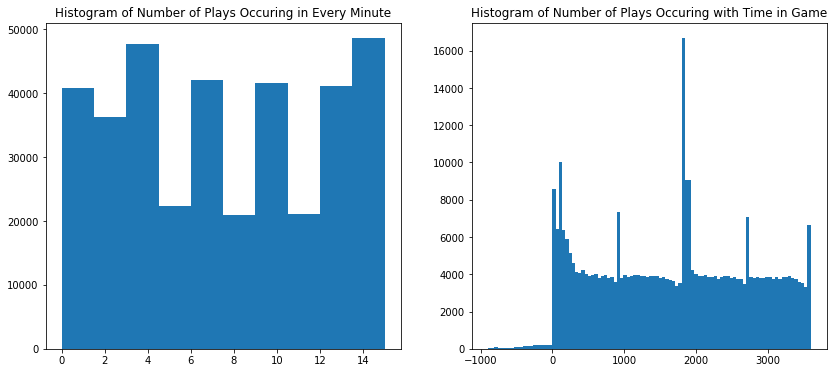

In [60]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_cleaned['TimeUnder'])
plt.title('Histogram of Number of Plays Occuring in Every Minute')
plt.subplot(1,2,2)
plt.hist(df_cleaned['TimeSecs'].dropna(),bins=100)
plt.title('Histogram of Number of Plays Occuring with Time in Game')

Text(0.5,1,'Number of Plays Occuring of each Type')

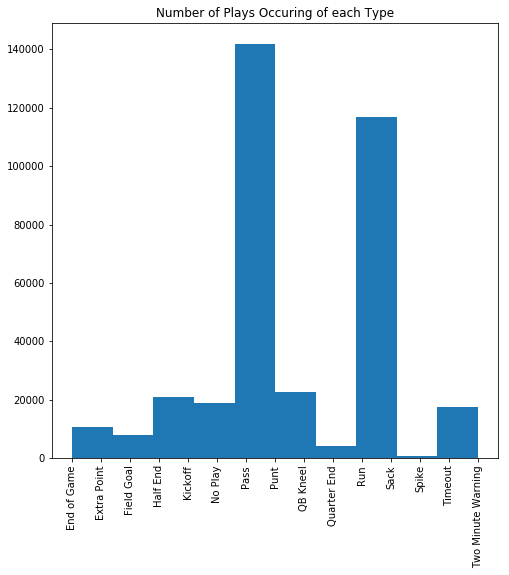

In [61]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned['PlayType'])
plt.xticks(rotation=90)
plt.title('Number of Plays Occuring of each Type')

Text(0.5,1,'Histograms of Number of Downs by Play')

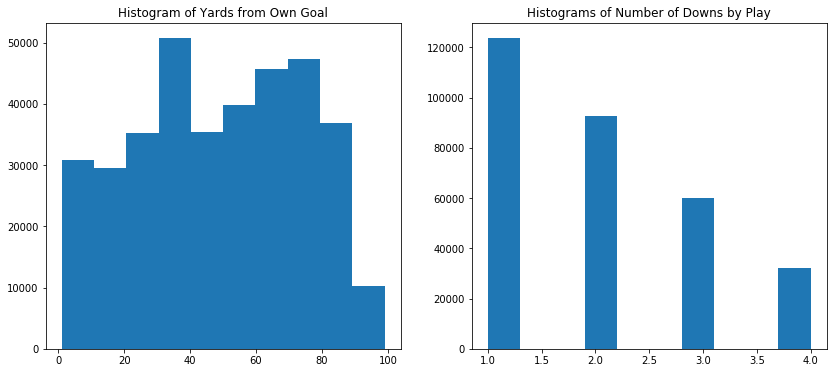

In [62]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_cleaned['yrdline100'].dropna())
plt.title('Histogram of Yards from Own Goal')
plt.subplot(1,2,2)
plt.hist(df_cleaned['down'].dropna())
plt.title('Histograms of Number of Downs by Play')

Text(0.5,1,'Histogram of Score Differential')

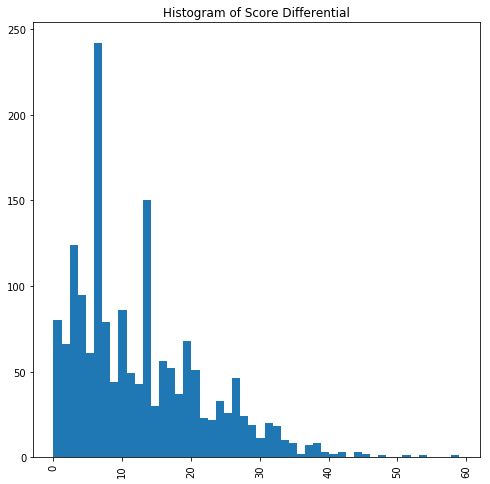

In [63]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned.loc[df_cleaned['PlayType']=='End of Game', 'ScoreDiff'].apply(abs).dropna(), bins=50)
plt.xticks(rotation=90)
plt.title('Histogram of Score Differential')

## Write Data to new CSV

In [64]:
df_cleaned[(df_cleaned['Season'] == 2009) | (df_cleaned['Season']==2010) | (df_cleaned['Season']==2011) | (df_cleaned['Season']==2012)].to_csv('NFL_PlaybyPlay_Cleaned_2009_2012')
df_cleaned[(df_cleaned['Season'] == 2013) | (df_cleaned['Season']==2014) | (df_cleaned['Season']==2015) | (df_cleaned['Season']==2016)].to_csv('NFL_PlaybyPlay_Cleaned_2013_2016')

df_cleaned['Season'].unique()


array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

## More Exploratory Analysis

In [65]:
df_cleaned.head()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,Safety,Onsidekick,PuntResult,PlayType,InterceptionThrown,ReturnResult,FieldGoalResult,FieldGoalDistance,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season,result
0,2009091000,1,1,NaN,15,3600.0,30.0,0,0,0.0,NaN,PIT,TEN,39,0,0,NaN,NaN,0,0,NaN,Kickoff,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009,T
1,2009091000,1,1,1.0,15,3593.0,58.0,10,5,0.0,0.0,PIT,TEN,5,0,0,NaN,NaN,0,0,NaN,Pass,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,2009,T
2,2009091000,1,1,2.0,15,3556.0,53.0,5,2,0.0,0.0,PIT,TEN,-3,0,0,NaN,NaN,0,0,NaN,Run,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009,T
3,2009091000,1,1,3.0,14,3515.0,56.0,8,2,0.0,0.0,PIT,TEN,0,0,0,NaN,NaN,0,0,NaN,Pass,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,2009,T
4,2009091000,1,1,4.0,14,3507.0,56.0,8,2,0.0,1.0,PIT,TEN,0,0,0,NaN,NaN,0,0,Clean,Punt,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009,T


In [66]:
print('Total Number of plays ran: ',df_cleaned.loc[(pd.notnull(df_cleaned['posteam']))].shape[0])
print('Total Number of downed plays ran: ', df_cleaned.loc[(pd.notnull(df_cleaned['posteam'])) & 
                                                           (pd.notnull(df_cleaned['down']))].shape[0])
print('Number of Touchdowns: ', df_cleaned[df_cleaned['Touchdown']==1].shape[0])
print('Number of Safetys: ', df_cleaned[df_cleaned['Safety']==1].shape[0])
print('Number of onside kicks: ', df_cleaned[df_cleaned['Onsidekick']==1].shape[0])
print('Number of Interceptions: ', df_cleaned[df_cleaned['InterceptionThrown']==1].shape[0])
print('Number of Field Goals: ', df_cleaned[pd.notnull(df_cleaned['FieldGoalResult'])].shape[0])
print('Number of Penalties: ', df_cleaned[df_cleaned['Penalty.Yards'] != 0].shape[0])

Total Number of plays ran:  340468
Total Number of downed plays ran:  308229
Number of Touchdowns:  10571
Number of Safetys:  142
Number of onside kicks:  496
Number of Interceptions:  4065
Number of Field Goals:  8016
Number of Penalties:  25859


In [107]:
plays = ['Pass','Run','Sack','QB Kneel','Spike','Field Goal']
df_filtered = df_cleaned[(df_cleaned['PlayType'].isin(plays))]
df_filtered = df_filtered[(pd.isna(df_filtered['TwoPointConv'])) & 
                          (df_filtered['Onsidekick']==0) & 
                         ~(pd.isna(df_filtered['down'])) ]
dropped_cols = ['GameID','posteam','DefensiveTeam','PuntResult','Onsidekick','ExPointResult','sp',
                'TimeUnder','TwoPointConv','ReturnResult','FieldGoalResult','FieldGoalDistance','PosTeamScore',
                'DefTeamScore','AbsScoreDiff','HomeTeam','AwayTeam','No_Score_Prob','Opp_Field_Goal_Prob',
                'Opp_Safety_Prob','Opp_Field_Goal_Prob','Touchdown_Prob','ExPoint_Prob','TwoPoint_Prob','ExpPts',
                'EPA','Win_Prob','WPA','Season','Opp_Safety_Prob','Opp_Touchdown_Prob','Home_WP_pre','Away_WP_pre',
                'Home_WP_post','Away_WP_post', 'Field_Goal_Prob', 'Safety_Prob', 'PlayType']
df_filtered = df_filtered.drop(columns=dropped_cols)

In [108]:
df_filtered.isna().any()

Drive                          False
qtr                            False
down                           False
TimeSecs                       False
yrdline100                     False
ydstogo                        False
ydsnet                         False
GoalToGo                       False
FirstDown                      False
Yards.Gained                   False
Touchdown                      False
Safety                         False
InterceptionThrown             False
Penalty.Yards                  False
ScoreDiff                      False
HomeTimeouts_Remaining_Pre     False
AwayTimeouts_Remaining_Pre     False
HomeTimeouts_Remaining_Post    False
AwayTimeouts_Remaining_Post    False
result                         False
dtype: bool

In [117]:
print(df_filtered.shape)
df_filtered.head(100)

(269823, 20)


,Drive,qtr,down,TimeSecs,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,Yards.Gained,Touchdown,Safety,InterceptionThrown,Penalty.Yards,ScoreDiff,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,result
1,1,1,1.0,3593.0,58.0,10,5,0.0,0.0,5,0,0,0,0,0.0,3,3,3,3,T
2,1,1,2.0,3556.0,53.0,5,2,0.0,0.0,-3,0,0,0,0,0.0,3,3,3,3,T
3,1,1,3.0,3515.0,56.0,8,2,0.0,0.0,0,0,0,0,0,0.0,3,3,3,3,T
5,2,1,1.0,3496.0,98.0,10,0,0.0,0.0,0,0,0,0,0,0.0,3,3,3,3,T
6,2,1,2.0,3460.0,98.0,10,4,0.0,0.0,4,0,0,0,0,0.0,3,3,3,3,T
7,2,1,3.0,3431.0,94.0,6,2,0.0,0.0,-2,0,0,0,0,0.0,3,3,3,3,T
9,3,1,1.0,3384.0,43.0,10,3,0.0,0.0,3,0,0,0,0,0.0,3,3,3,3,T
10,3,1,2.0,3348.0,40.0,7,13,0.0,1.0,10,0,0,0,0,0.0,3,3,3,3,T
11,3,1,1.0,3321.0,30.0,10,12,0.0,0.0,-1,0,0,0,0,0.0,3,3,3,3,T
12,3,1,2.0,3283.0,31.0,11,21,0.0,0.0,9,0,0,0,0,0.0,3,3,3,3,T


## Initial Model Buidling

### Version 1.

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

outcome = df_filtered.result
features = df_filtered.drop(columns=['result'])

X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.25, random_state=42)

random_forest_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, random_state=42)

random_forest_classifier.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [125]:
feature_importances = random_forest_classifier.feature_importances_
feature_df = pd.DataFrame(feature_importances, columns=['Importance'])
feature_df['Cols'] = X_train.columns
prediction = random_forest_classifier.predict(X_test)
print('Test Accuracy Rate: ',round(accuracy_score(y_test, prediction),3))

Test Accuracy Rate:  0.685


In [121]:
probabilities = random_forest_classifier.predict_proba(X_test)

In [126]:
feature_df

,Importance,Cols
0,0.082922,Drive
1,0.019260,qtr
2,0.030432,down
3,0.163677,TimeSecs
4,0.120951,yrdline100
5,0.059024,ydstogo
6,0.115194,ydsnet
7,0.002992,GoalToGo
8,0.010274,FirstDown
9,0.079127,Yards.Gained


In [137]:
prob_df = pd.DataFrame(probabilities[:,0], columns=['win_probabilities'])
prob_df.head(10)


,win_probabilities
0,0.45
1,0.25
2,0.45
3,0.05
4,0.50
5,0.25
6,0.95
7,0.00
8,0.35
9,0.95


### Version 2.

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_parameters = {'criterion':['entropy','gini'],
                 'max_depth':[x for x in range(4,40,2)], 
                 'n_estimators':[x for x in range(50, 200, 10)]}

rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=10, n_jobs=-1)
rf_clf.fit(X_train, y_train)

In [ ]:
rf_clf.grid_scores_

In [ ]:
rf_clf.score(X_test, y_test)

### Version 3.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=10)

scaled_train = pca.fit_transform(scale(X_train))
scaled_test = pca.transform(scale(X_test))

In [ ]:
pca_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=10, n_jobs=-1)
pca_rf_clf.fit(scaled_train, y_train)

In [ ]:
rf_clf.grid_scores_

In [ ]:
rf_clf.score(scaled_test, y_test)